## Follows from NLP in NLP_Musixmatch notebook
### Routine to count up and plot occurrence of words by year
### Particular words chosen are taken from previous NLP_Sentiment_TDIF analysis

In [41]:
# import things
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup  
import re
import string
import operator
from __future__ import division
import datetime
#import nltk
#nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
#read df from pickle file
lyrics_df = pd.read_pickle('CleanedLyricsDF_MaxRank_100')
print 'lyrics_df has ', len(lyrics_df), ' songs'
print lyrics_df.head(3)
#read hot100df from pickle file
hot100_df = pd.read_pickle('./Billboard100DF_cleaned')
print 'hot100_df has ', len(hot100_df), ' songs'

print lyrics_df.shape
print lyrics_df.head(3)
print lyrics_df.date[5]

lyrics_df = lyrics_df.reset_index()

lyrics_df has  15868  songs
                        hot100 artist       hot100 track         track_name  \
0                        Ricky Nelson   Poor Little Fool   Poor Little Fool   
2                         Bobby Darin      Splish Splash      Splish Splash   
3  Elvis Presley With The Jordanaires  Hard Headed Woman  Hard Headed Woman   

                       artist_name        track_spotify_id  \
0                     Ricky Nelson  6kGo2CzDxnPP6pxbqABZ7l   
2                      Bobby Darin  4RxtXFzUxQCOBAbggjN7mM   
3  Elvis Presley & The Jordanaires                           

                                         lyrics_body       date  \
0  I used to play around with hearts\nThat hasten... 1958-09-13   
2  Splish splash, I was taking a bath\nLong about... 1958-09-06   
3  Well a hard headed woman\nA soft hearted man\n... 1958-09-06   

                           lyrics_clean_no_stopwords  lex_diversity  
0  used play around hearts hastened call met litt...       0.604167

In [43]:
##NOTE For some reason it helped to reset_index of lyrics_df in the cell above.

In [44]:
total_lyrics = []

for i in range(len(lyrics_df['track_name'])):
    subset = lyrics_df[(lyrics_df['track_name'] == lyrics_df['track_name'][i]) ]
    lyrics = subset.lyrics_clean_no_stopwords
    lyrics = string.join(lyrics) #join all the words into one string
    total_lyrics.append(lyrics)
                   
print len(total_lyrics)

15868


In [45]:
# make bag-of-words arrays for each decade, both raw and tfidf-weighted
transformer = TfidfTransformer() #to do tfidf weighting on all of the bag_of_words vectors

all3_total_vec = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000, \
                             ngram_range=(1,3)) 
all3_total_features = all3_total_vec.fit_transform(total_lyrics).toarray()
#tfidf_all3 = transformer.fit_transform(all3_features)
#tfidf_all3 = tfidf_all3.toarray()



In [46]:
print np.shape(all3_total_features)

print all3_total_features[1]

(15868, 5000)
[0 0 0 ..., 0 0 0]


In [47]:
# Take a look at the words in the vocabulary
vocab = all3_total_vec.get_feature_names()
print len(vocab)
#print (vocab)

# Sum up the counts of each vocabulary word
dist_all3_total = np.sum(all3_total_features, axis=0)

#for tag, count in zip(vocab, dist_all3_total):
#    print (count, tag)

5000


In [48]:
print dist_all3_total
#print vocab

[105  50  42 ...,  80  58  40]


In [49]:
#normalize word counts by TOTAL number of words
#dist_all3_total = dist_all3_total / dist_all3_total.sum()

#print dist_all3_total
#print dist_all3_total.sum()

In [86]:
#plot nubmer of occurrences per year of a few interesting words over time
#if we want to do tf-idf to see what words are unique in particular decades, we need to make a new
# dataframe with only 50 60 70 80 90 00 10 (7 rows, one for each decade), and all the lyrics from that decade in
# each row
years_lyrics = []
years = []
y = 1958

for i in range(0,58):
    years.append(1958+i)

print years
    
for y in years:
#    print y, '\'s'
    start_date = datetime.date(year=y,month=1,day=1)
    end_date = datetime.date(year=y+1,month=1,day=1)
    subset = lyrics_df[(lyrics_df['date'] > start_date) & (lyrics_df['date'] < end_date) ]
    lyrics = subset.lyrics_clean_no_stopwords
    lyrics = string.join(lyrics) #join all the words into one string
    years_lyrics.append(lyrics)
    
print len(years_lyrics)


[1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
58


In [87]:
# make bag-of-words arrays for each year, both raw and tfidf-weighted
transformer = TfidfTransformer(smooth_idf=False) #to do tfidf weighting on all of the bag_of_words vectors

all3_vec = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000, \
                             ngram_range=(1,3)) 
all3_features = all3_vec.fit_transform(years_lyrics)
tfidf_all3 = transformer.fit_transform(all3_features)
all3_features = all3_features.toarray()
tfidf_all3 = tfidf_all3.toarray()

bigram_vec = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000, \
                             ngram_range=(2,2))
bigram_features = bigram_vec.fit_transform(years_lyrics)
tfidf_bigram = transformer.fit_transform(bigram_features)
bigram_features = bigram_features.toarray()
tfidf_bigram = tfidf_bigram.toarray()

trigram_vec = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000, \
                             ngram_range=(3,3)) 
trigram_features = trigram_vec.fit_transform(years_lyrics)
tfidf_trigram = transformer.fit_transform(trigram_features)
trigram_features = trigram_features.toarray()
tfidf_trigram = tfidf_trigram.toarray()

In [97]:
# tfidf now...
n=10
for i in range(len(years)):
    vocab = all3_vec.get_feature_names()
    #print str(years[i])
    dist = tfidf_all3[i] #one row of word features
    count_dict = dict(zip(vocab, dist))
    sorted_count_dict = sorted(count_dict.items(), key=operator.itemgetter(1),reverse=True)
    #print n, ' most frequent features:'
    #print years[i], sorted_count_dict[0:n]
    word, freq = zip(*sorted_count_dict)
    
    print years[i], map(lambda x: x.encode('ascii'), word[0:10])
    #print map(lambda x: x.encode('ascii'), my_list)

 1958 ['love', 'hoop', 'oh', 'hula', 'baby', 'know', 'got', 'like', 'well', 'little']
1959 ['love', 'oh', 'bom', 'yi', 'never', 'doom', 'baby', 'na na', 'na na na', 'girl']
1960 ['oop', 'oop oop', 'oop oop oop', 'love', 'alley oop', 'know', 'oh', 'ah ah ah', 'one', 'little']
1961 ['love', 'oh', 'baby', 'know', 'little', 'like', 'never', 'time', 'let', 'heart']
1962 ['love', 'oh', 'know', 'baby', 'dah dah', 'dah', 'one', 'dah dah dah', 'yeah', 'like']
1963 ['love', 'oh', 'know', 'yeah', 'baby', 'monkey monkey', 'little', 'go', 'girl', 'got']
1964 ['love', 'bird bird', 'oh', 'know', 'bird bird bird', 'yeah', 'baby', 'got', 'bird', 'mow']
1965 ['love', 'baby', 'know', 'got', 'oh', 'like', 'one', 'yeah', 'say', 'come']
1966 ['batman batman', 'love', 'batman batman batman', 'baby', 'batman', 'know', 'oh', 'yeah', 'got', 'girl']
1967 ['love', 'baby', 'oh', 'know', 'yeah', 'like', 'go', 'got', 'get', 'girl']
1968 ['love', 'baby', 'oh', 'know', 'got', 'get', 'yeah', 'come', 'like', 'see']
1969

In [89]:
my_word_arr = ['love', 'like', 'know', 'want', 'think','cha cha', 'money', 'girl', 'woman', 'boy', 'man', 'shit', 'fuck', 'damn']


In [90]:
word_rate = {'year': years}

for j in range(0,len(my_word_arr)):
    for i in range(1,5000):
        if vocab[i] == my_word_arr[j]:
            word_index = i

    print j, my_word_arr[j]

    my_word_rate = []
    for i in range(len(years)):
        #vocab = all3_vec.get_feature_names()
        #print str(years[i]), dist[word_index], vocab[word_index]
        my_word_rate.append(dist[word_index])
        dist = all3_features[i] #one row of word features
        count_dict = dict(zip(vocab, dist))
        sorted_count_dict = sorted(count_dict.items(), key=operator.itemgetter(1),reverse=True)

    word_rate[my_word_arr[j]] = my_word_rate
    print word_rate[my_word_arr[j]]

0 love
[0.19576827767000557, 101, 204, 218, 239, 231, 260, 278, 307, 298, 311, 322, 326, 213, 281, 221, 196, 265, 277, 315, 285, 238, 327, 295, 285, 249, 247, 245, 191, 242, 282, 299, 310, 285, 321, 177, 215, 191, 193, 153, 247, 175, 206, 200, 161, 183, 221, 141, 115, 141, 143, 142, 197, 213, 145, 162, 207, 192]
1 like
[336, 38, 58, 71, 80, 93, 74, 93, 109, 87, 119, 101, 111, 79, 107, 117, 109, 101, 132, 112, 98, 149, 127, 128, 110, 122, 121, 129, 105, 106, 103, 152, 141, 149, 162, 141, 223, 213, 167, 146, 165, 179, 229, 189, 164, 182, 272, 305, 265, 272, 287, 335, 266, 308, 329, 268, 307, 291]
2 know
[251, 48, 69, 109, 97, 140, 141, 140, 154, 158, 138, 142, 157, 120, 152, 159, 179, 155, 147, 155, 137, 129, 156, 132, 131, 140, 196, 166, 185, 164, 148, 172, 196, 187, 217, 186, 184, 163, 147, 135, 160, 226, 198, 255, 199, 222, 210, 245, 219, 213, 256, 231, 276, 202, 221, 153, 279, 254]
3 want
[110, 10, 37, 47, 35, 39, 44, 64, 70, 75, 77, 54, 75, 38, 84, 60, 54, 52, 49, 56, 50, 63, 85, 62

[155, 0, 0, 0, 3, 1, 1, 0, 2, 4, 0, 1, 4, 1, 3, 0, 5, 4, 3, 0, 5, 5, 8, 1, 2, 6, 1, 3, 0, 1, 0, 1, 3, 6, 7, 18, 53, 47, 56, 40, 49, 69, 68, 80, 81, 61, 92, 97, 76, 59, 68, 47, 57, 89, 96, 61, 170, 117]


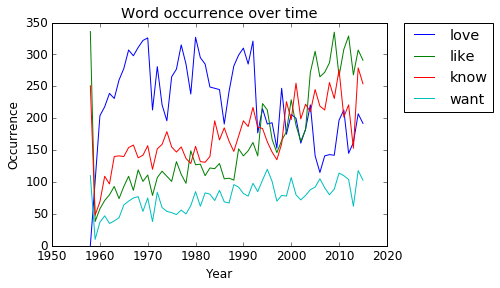

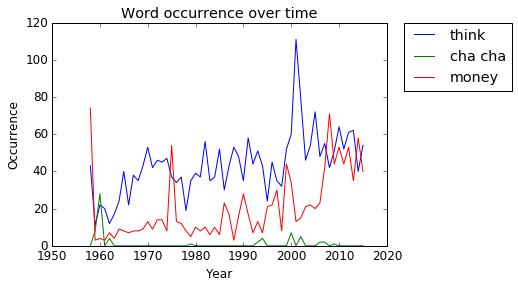

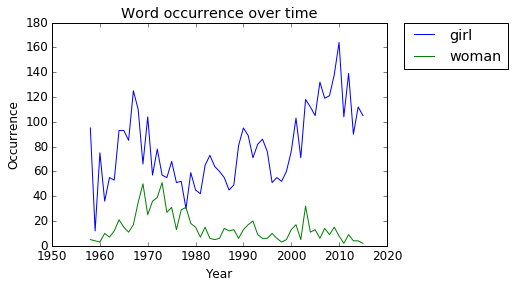

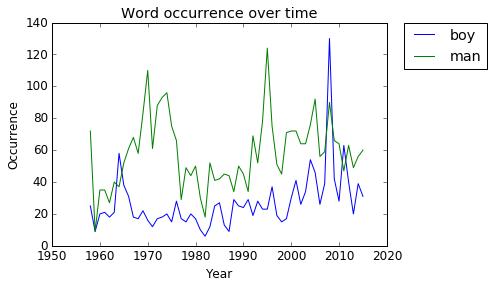

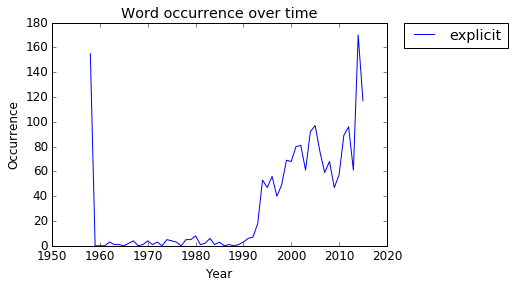

In [91]:
#my_word_arr = ['love', 'like', 'know', 'cha cha', 'money', 'girl', 'woman']
#plot year versus my_word_rate
matplotlib.rcParams.update({'font.size': 12})

explicit = []
for i in range(len(years)):
    explicit.append(word_rate['shit'][i] + word_rate['fuck'][i] + word_rate['damn'][i])

print explicit
    
plt.subplot(111)
plt.title('Word occurrence over time')
plt.xlabel('Year')
plt.ylabel('Occurrence')
for j in range(0,4):
    plt.plot(years, word_rate[my_word_arr[j]], label = my_word_arr[j]) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("rate1.png")
plt.show()


plt.title('Word occurrence over time')
plt.xlabel('Year')
plt.ylabel('Occurrence')
for j in range(4,7):
    plt.plot(years, word_rate[my_word_arr[j]], label = my_word_arr[j]) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("rate2.png")
plt.show()


plt.title('Word occurrence over time')
plt.xlabel('Year')
plt.ylabel('Occurrence')
for j in range(7,9):
    plt.plot(years, word_rate[my_word_arr[j]], label = my_word_arr[j]) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("rate3.png")
plt.show()


plt.title('Word occurrence over time')
plt.xlabel('Year')
plt.ylabel('Occurrence')
for j in range(9,11):
    plt.plot(years, word_rate[my_word_arr[j]], label = my_word_arr[j]) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("rate4.png")
plt.show()

plt.title('Word occurrence over time')
plt.xlabel('Year')
plt.ylabel('Occurrence')
plt.plot(years, explicit, label = 'explicit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("rate5.png")
plt.show()
